In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv(r"C:\Users\HP\Downloads\ML Project - Logistic Regression Titanic Survival U16955478860.csv")

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
data.drop(data[data['Embarked'].isnull()].index,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [22]:
data['Age']=data['Age'].fillna(30)

In [23]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [25]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
data.drop('Cabin',axis=1,inplace=True)

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [29]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
data.replace(['male', 'female'],[0,1],inplace=True)

In [31]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
data.replace(['S', 'C', 'Q'],[0,1,2],inplace=True)

In [33]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,30.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [34]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [35]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=45)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression()

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.score(x_train,y_train)

0.8059071729957806

In [43]:
model.score(x_test,y_test)

0.7865168539325843

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [45]:
confusion_matrix(y_test,model.predict(x_test))

array([[103,  14],
       [ 24,  37]], dtype=int64)

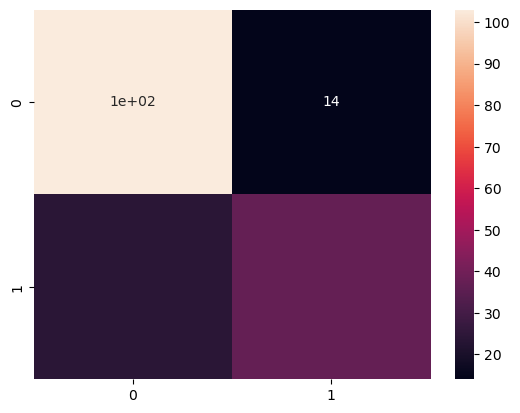

In [46]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True);

In [47]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       117
           1       0.73      0.61      0.66        61

    accuracy                           0.79       178
   macro avg       0.77      0.74      0.75       178
weighted avg       0.78      0.79      0.78       178



In [48]:
accuracy_score(y_test,model.predict(x_test))

0.7865168539325843

In [49]:
precision_score(y_test,model.predict(x_test))

0.7254901960784313

In [50]:
recall_score(y_test,model.predict(x_test))

0.6065573770491803

In [51]:
f1_score(y_test,model.predict(x_test))

0.6607142857142857

# Find the probability of testing data 

In [52]:
model.predict_proba(x_test)

array([[0.66662851, 0.33337149],
       [0.05863795, 0.94136205],
       [0.83381045, 0.16618955],
       [0.83687263, 0.16312737],
       [0.16378041, 0.83621959],
       [0.22012459, 0.77987541],
       [0.83104679, 0.16895321],
       [0.90571341, 0.09428659],
       [0.77712384, 0.22287616],
       [0.59094173, 0.40905827],
       [0.596514  , 0.403486  ],
       [0.8774078 , 0.1225922 ],
       [0.58225454, 0.41774546],
       [0.96456678, 0.03543322],
       [0.84719047, 0.15280953],
       [0.75370401, 0.24629599],
       [0.74676047, 0.25323953],
       [0.16739146, 0.83260854],
       [0.86114567, 0.13885433],
       [0.20769979, 0.79230021],
       [0.64880959, 0.35119041],
       [0.85801573, 0.14198427],
       [0.91362727, 0.08637273],
       [0.91399454, 0.08600546],
       [0.34386167, 0.65613833],
       [0.31545248, 0.68454752],
       [0.11112342, 0.88887658],
       [0.78804263, 0.21195737],
       [0.1684439 , 0.8315561 ],
       [0.91799167, 0.08200833],
       [0.

In [53]:
accuracy_score(y_test,model.predict(x_test))

0.7865168539325843

#   display ROC find the AUC score

In [54]:
from  sklearn.metrics import roc_curve,roc_auc_score,auc

In [55]:
y_prob=model.predict_proba(x_test)[:,1]

In [56]:
fpr,tpr,thresol=roc_curve(y_test,y_prob)

In [57]:
auc(fpr,tpr)

0.8272383354350568

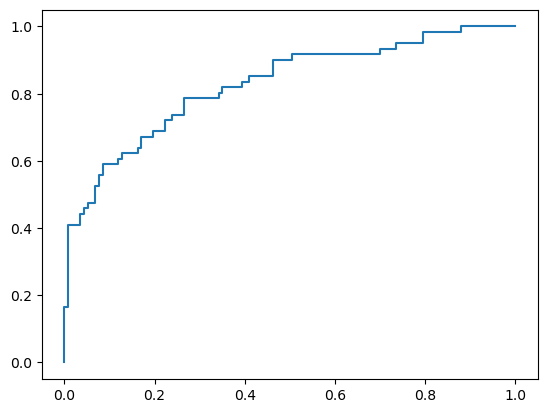

In [58]:
plt.plot(fpr,tpr);

In [67]:
roc_auc_score(y_test,y_prob)

0.8272383354350568